In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import csv
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit


In [2]:
# Model-specific imports:
from sklearn.tree  import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [6]:
inputData = pd.read_excel('../Volumetric_features.xlsx', engine='openpyxl').sample(frac = 1)
inputData.head()

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
918,919,18972.7,542.0,12804.5,44621.3,5589.9,2941.5,4097.4,2051.7,1775.7,...,1.824,1.977,3.323,1.845,2.319,1.90311,929883,1384612.285,75,1
2031,2032,6260.9,337.0,12746.3,50200.0,6498.1,3141.2,3937.4,1708.8,947.5,...,2.553,2.555,3.953,2.372,2.823,2.43212,989183,1376664.786,51,4
3964,3965,7292.3,314.9,19120.3,57003.7,7307.5,3734.8,4934.0,2178.1,1064.7,...,2.677,2.606,3.672,2.780,3.304,2.53735,1165889,1574947.934,67,9
103,104,10756.4,718.2,14725.7,50634.9,6360.7,3278.7,4761.3,1853.1,2359.5,...,2.472,2.752,3.785,2.066,2.810,2.30363,1069096,1404445.989,71,1
2207,2208,9202.7,21.4,15553.1,55612.2,8268.1,2984.9,4137.0,1960.8,1489.1,...,2.526,2.744,3.733,2.445,2.836,2.41369,1129559,1442766.270,49,4


In [7]:
# select the input brain volume vector (X) and the output age vector (y)
X = inputData.drop(columns=['S.No', 'Age', 'dataset'])
y = inputData['Age']

# split the X and y vectors into training and testing dataset
# we're using 80% for training and 20% for testing, but this can change
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [187]:
# instantiate a decision tree model using sklearn:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=6, min_samples_leaf=4, min_samples_split=2)


# fit the model to the training data
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [189]:
# check the model's performance on unseen, test data
dt_predictions = dt_model.predict(X_test)

# compare the predictions to the known values (y_test)
print('r square value:', metrics.r2_score(y_test, dt_predictions))
print('mean absolute error (years):', metrics.mean_absolute_error(y_test, dt_predictions))
print('mean square error:', metrics.mean_squared_error(y_test, dt_predictions))
print('root mean sqaure error (years):', np.sqrt(metrics.mean_squared_error(y_test, dt_predictions)))

r square value: 0.7343210234507795
mean absolute error (years): 7.185590045424659
mean square error: 105.79155466897721
root mean sqaure error (years): 10.285502159300595


In [186]:
param_dict={"criterion" : ['friedman_mse', 'mse', 'mae'],
            "max_depth" : range(1,10),
            "min_samples_split" : range(2,10), 
            "min_samples_leaf" : range(2,5)
           }
grid = GridSearchCV(dt_model, param_grid=param_dict, verbose=1, n_jobs=1)
grid.fit(X_train, y_train)
print(grid.best_params_)

C:\Users\aulak\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   20.7s finished


{'criterion': 'mse'}


### ADA Boost Regressor (based on DT)

In [205]:
# instantiate a voting regressor model using sklearn:
abr_model = AdaBoostRegressor(loss='linear', learning_rate= 1, n_estimators= 200)


# fit the model to the training data
abr_model.fit(X_train, y_train)


# check the model's performance on unseen, test data
abr_predictions = abr_model.predict(X_test)

# compare the predictions to the known values (y_test)
print('r square value:', metrics.r2_score(y_test, abr_predictions))
print('mean absolute error (years):', metrics.mean_absolute_error(y_test, abr_predictions))
print('mean square error:', metrics.mean_squared_error(y_test, abr_predictions))
print('root mean sqaure error (years):', np.sqrt(metrics.mean_squared_error(y_test, abr_predictions)))

r square value: 0.8333063763999193
mean absolute error (years): 6.557319592741623
mean square error: 66.3762628985842
root mean sqaure error (years): 8.147162874190267


In [203]:
param_dict={"loss" : ['linear', 'square', 'exponential'],
            "n_estimators" : [10, 50, 100],
            "learning_rate" : [0.5, 1, 5]
           }
grid = GridSearchCV(vr_model, param_grid=param_dict, verbose=1, n_jobs=1)
grid.fit(X_train, y_train)
print(grid.best_params_)

C:\Users\aulak\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  2.0min finished


{'learning_rate': 1, 'n_estimators': 100}


### Neural Network

In [37]:
import tensorflow as tf
import csv
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit

In [56]:
dataSet = inputData

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)


maxEpoch = 250
verbNum = 1


base_ann = tf.keras.models.Sequential([
            tf.keras.layers.Dense(units=100, activation='relu'),
            tf.keras.layers.Dense(units=100, activation='relu'),
            tf.keras.layers.Dense(units=100, activation='relu'),
            tf.keras.layers.Dense(units=100, activation='relu'),
            tf.keras.layers.Dense(units=20, activation='relu'),
            tf.keras.layers.Dense(units=1, activation='linear')
        ])

# use convolution layers
# drop outs, max pooling

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
base_ann.compile(loss="mae", optimizer=optimizer)
base_ann.fit(X_train, y_train, epochs=maxEpoch, batch_size=64, verbose=verbNum)
ann_predictions = base_ann.predict(X_test)


print("rscore: ", metrics.r2_score(y_test, ann_predictions))
print("MAE: ", metrics.mean_absolute_error(y_test, ann_predictions))
print("MSE: ", np.sqrt(metrics.mean_squared_error(y_test, ann_predictions)))

Train on 3380 samples
Epoch 1/250
3380/3380 [==============================] - 2s 646us/sample - loss: 12621.0417
Epoch 2/250
3380/3380 [==============================] - 0s 118us/sample - loss: 2054.8269
Epoch 3/250
3380/3380 [==============================] - 0s 119us/sample - loss: 2786.1324
Epoch 4/250
3380/3380 [==============================] - 0s 121us/sample - loss: 2501.2289
Epoch 5/250
3380/3380 [==============================] - 0s 121us/sample - loss: 1350.2194
Epoch 6/250
3380/3380 [==============================] - 0s 116us/sample - loss: 1254.8348
Epoch 7/250
3380/3380 [==============================] - 0s 118us/sample - loss: 1113.3526
Epoch 8/250
3380/3380 [==============================] - 0s 123us/sample - loss: 969.6756
Epoch 9/250
3380/3380 [==============================] - 0s 136us/sample - loss: 630.8400
Epoch 10/250
3380/3380 [==============================] - 0s 122us/sample - loss: 558.3188
Epoch 11/250
3380/3380 [==============================] - 0s 121us/sa

3380/3380 [==============================] - 0s 120us/sample - loss: 13.3788
Epoch 92/250
3380/3380 [==============================] - 0s 120us/sample - loss: 13.1205
Epoch 93/250
3380/3380 [==============================] - 0s 122us/sample - loss: 13.6736
Epoch 94/250
3380/3380 [==============================] - 1s 161us/sample - loss: 14.6920
Epoch 95/250
3380/3380 [==============================] - 1s 194us/sample - loss: 14.5913
Epoch 96/250
3380/3380 [==============================] - 1s 182us/sample - loss: 13.2778
Epoch 97/250
3380/3380 [==============================] - 1s 189us/sample - loss: 13.0212
Epoch 98/250
3380/3380 [==============================] - 1s 248us/sample - loss: 12.9448
Epoch 99/250
3380/3380 [==============================] - 1s 191us/sample - loss: 13.7030
Epoch 100/250
3380/3380 [==============================] - 1s 189us/sample - loss: 14.2683
Epoch 101/250
3380/3380 [==============================] - 1s 184us/sample - loss: 13.3902
Epoch 102/250
3380/33

3380/3380 [==============================] - 1s 178us/sample - loss: 12.5608
Epoch 182/250
3380/3380 [==============================] - 1s 172us/sample - loss: 13.6206
Epoch 183/250
3380/3380 [==============================] - 1s 182us/sample - loss: 12.7937
Epoch 184/250
3380/3380 [==============================] - 1s 173us/sample - loss: 13.0743
Epoch 185/250
3380/3380 [==============================] - 1s 170us/sample - loss: 12.9143
Epoch 186/250
3380/3380 [==============================] - 1s 183us/sample - loss: 13.1371
Epoch 187/250
3380/3380 [==============================] - 1s 181us/sample - loss: 13.4458
Epoch 188/250
3380/3380 [==============================] - 1s 179us/sample - loss: 25.1184
Epoch 189/250
3380/3380 [==============================] - 1s 175us/sample - loss: 17.2704
Epoch 190/250
3380/3380 [==============================] - 1s 179us/sample - loss: 13.6176
Epoch 191/250
3380/3380 [==============================] - 1s 170us/sample - loss: 13.7825
Epoch 192/250

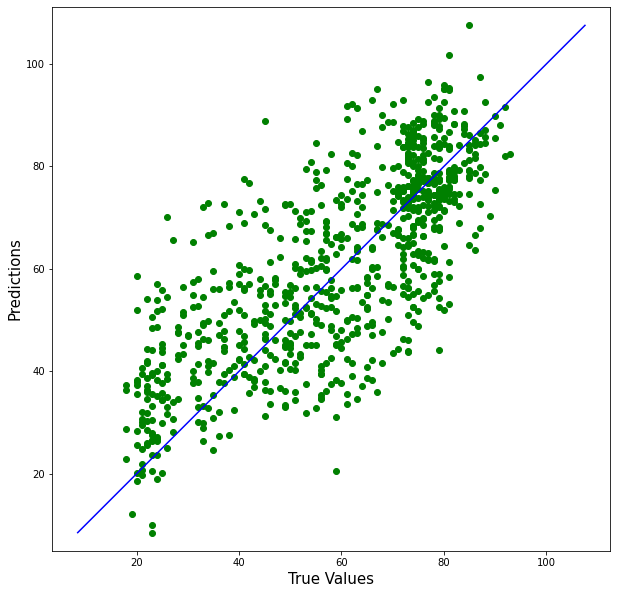

In [57]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, ann_predictions, c='green')
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(ann_predictions), max(y_test))
p2 = min(min(ann_predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()